In [22]:
import pandas as pd
import pathlib

import matplotlib.pyplot as plt
import seaborn as sns

allfiles = [item for item in pathlib.Path("SF100").glob("*.tsv")]
sfdf = pd.DataFrame()
for file in allfiles:
    tmpdf = pd.read_csv(file, sep = "\t")
    sfdf = pd.concat([sfdf, tmpdf], axis = 0)
sfdf["SampleID"] = sfdf["Sample"].apply(lambda x: x.split("_")[0].split("-")[1])
metadata = pd.read_excel("Label_Metadata_pairwise_ichorCNA_without_11_high_tumor_fraction_control_samples_nor 15.xlsx")
sfdf = sfdf.merge(metadata, left_on = "SampleID", right_on = "SampleID")

In [34]:
def assign_pred_type(Label, true_label, pred_label):
    if Label == "Control":
        if true_label == pred_label:
            return "TN"
        else:
            return "FP"
    else:
        if true_label == pred_label:
            return "TP"
        else:
            return "FN"
sfdf["type"] = sfdf[["Label", "true_label", "pred_label"]].apply(lambda x: assign_pred_type(x[0], x[1], x[2]), axis = 1)
sfdf["Set_general"] = sfdf["Set"].apply(lambda x: "train" if x == "train" else "test")

/var/folders/8j/g55jqp3s7mj16s_gvcwb4y800000gn/T/ipykernel_29651/935288645.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


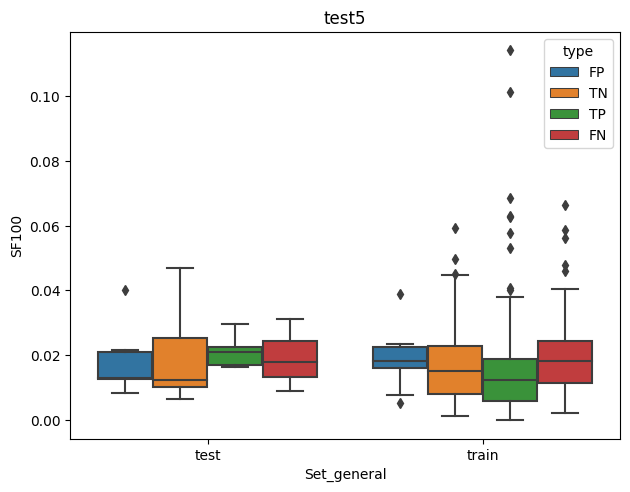

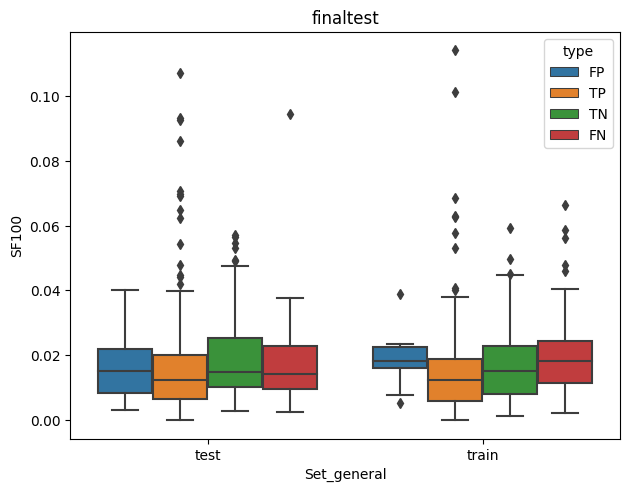

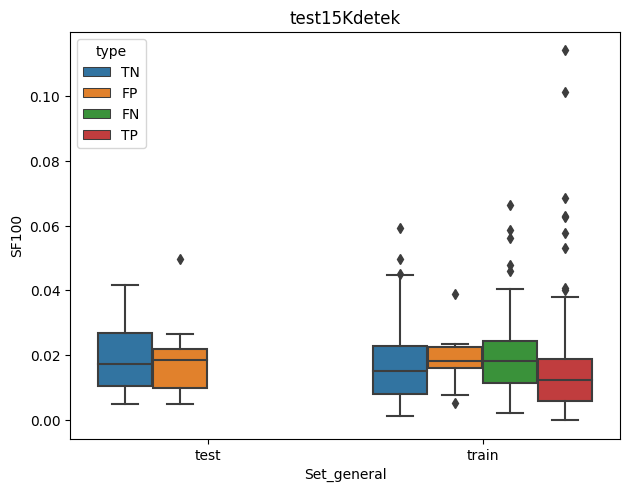

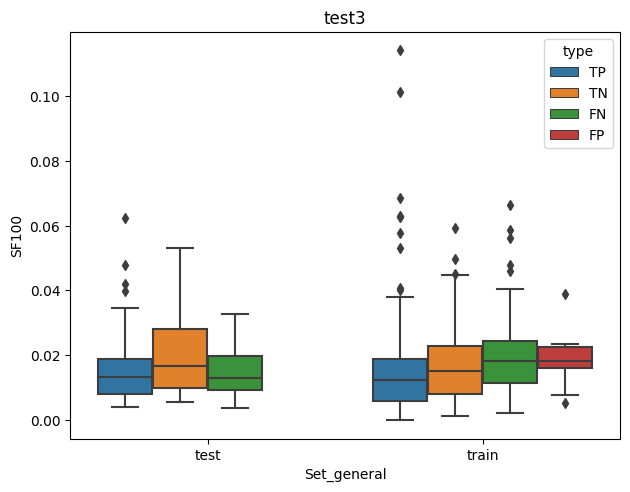

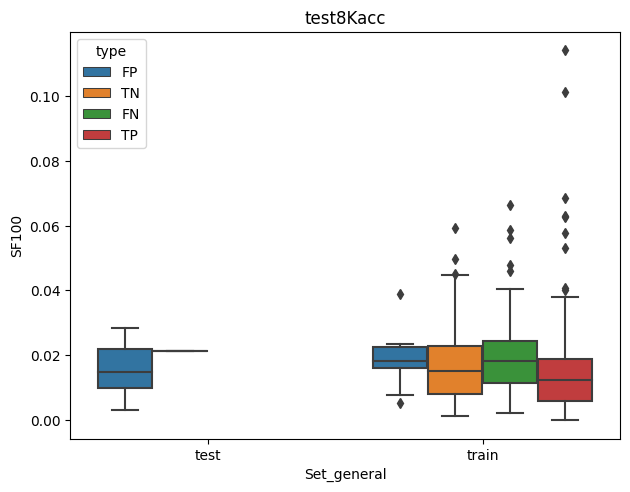

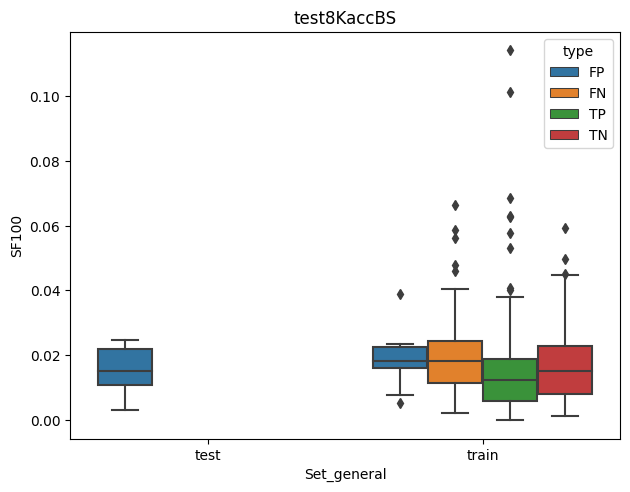

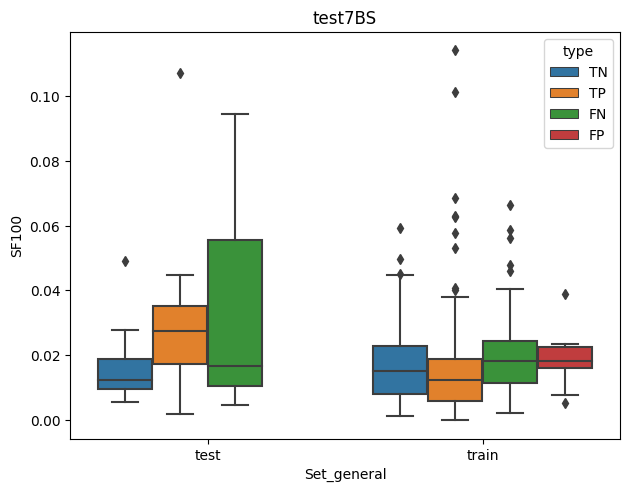

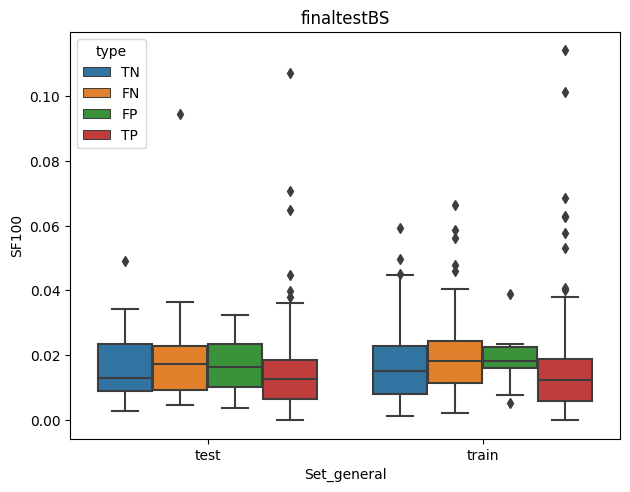

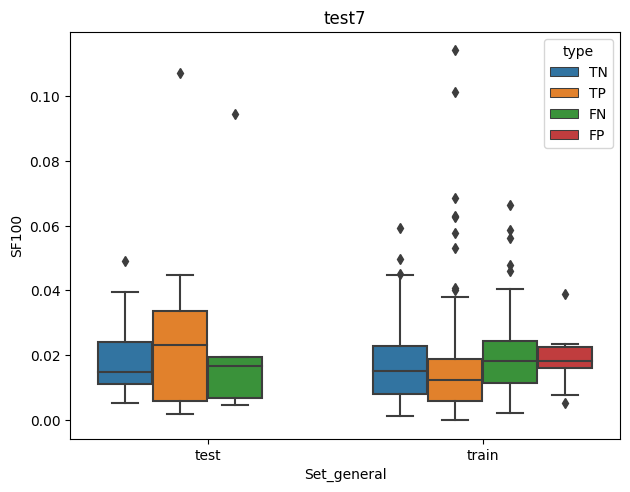

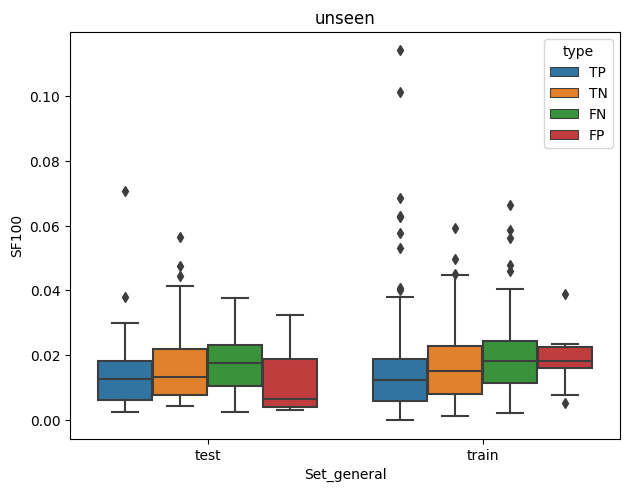

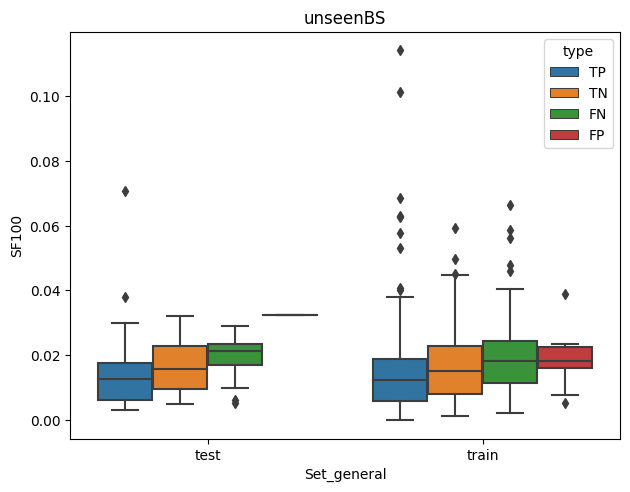

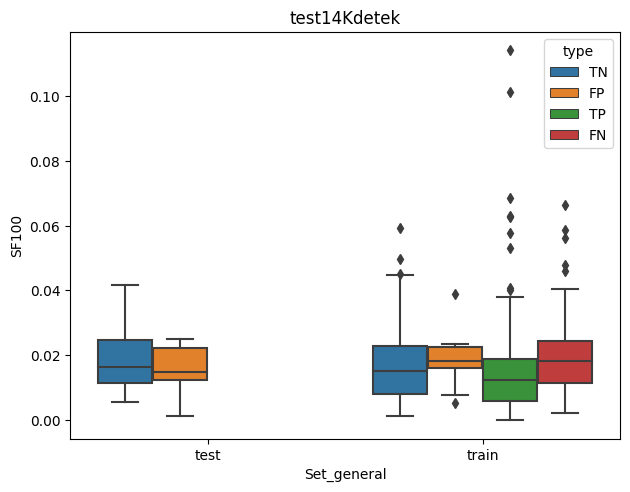

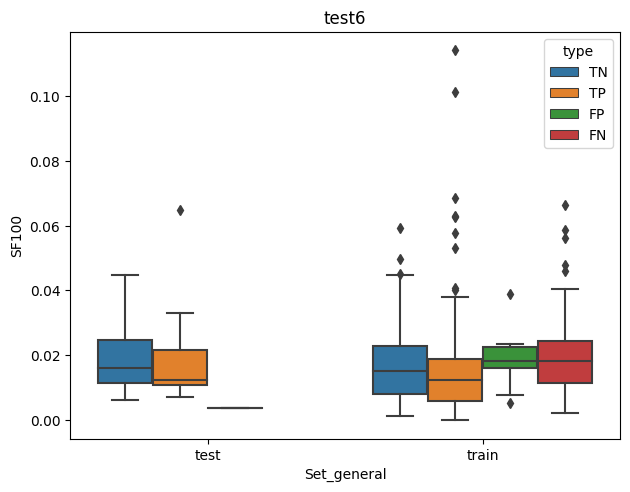

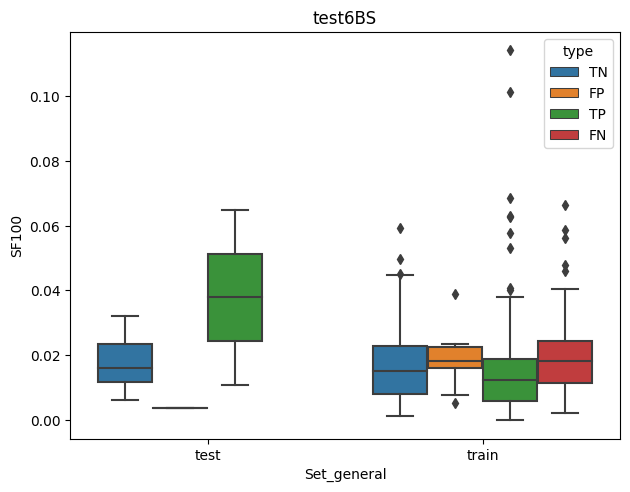

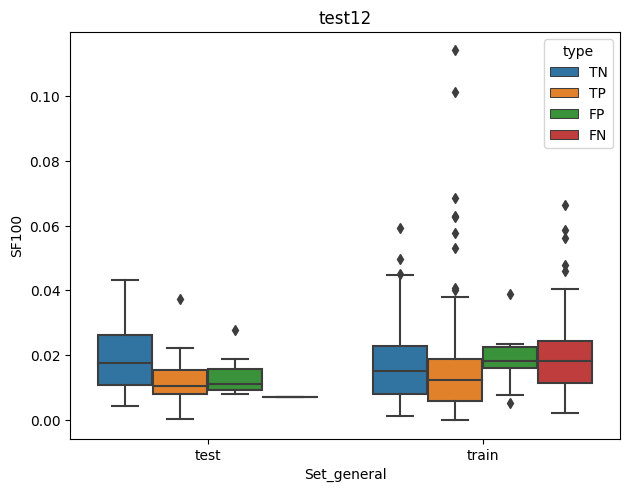

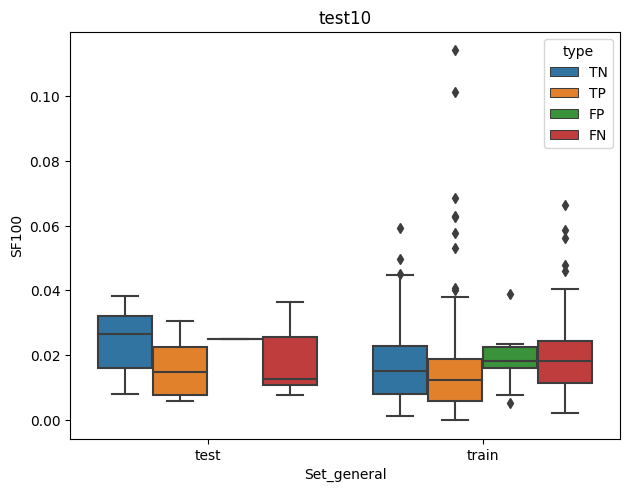

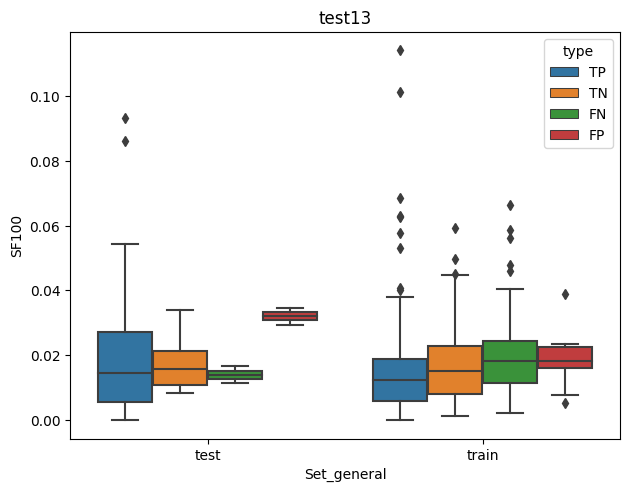

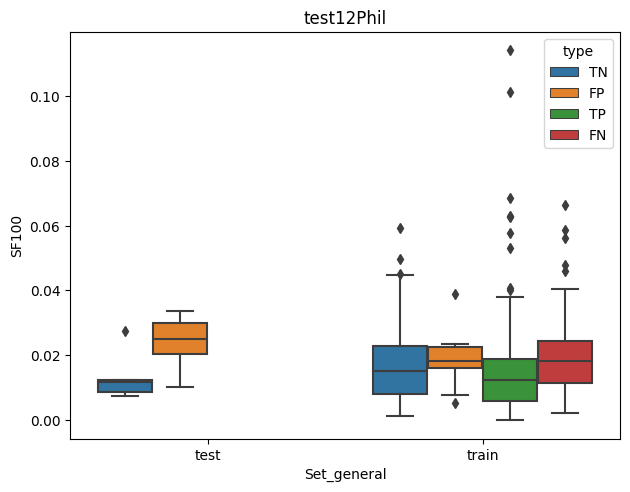

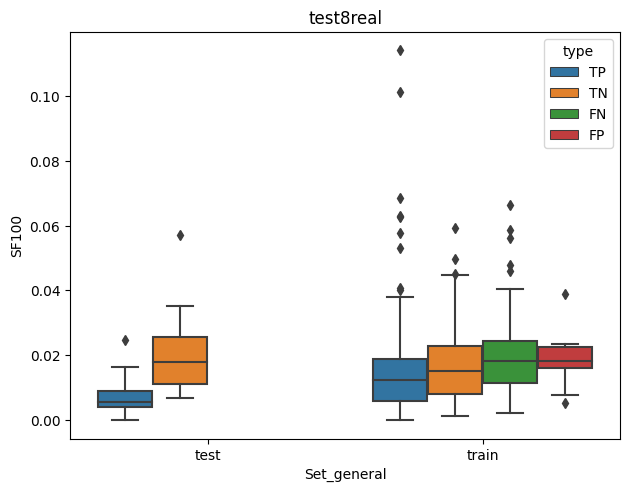

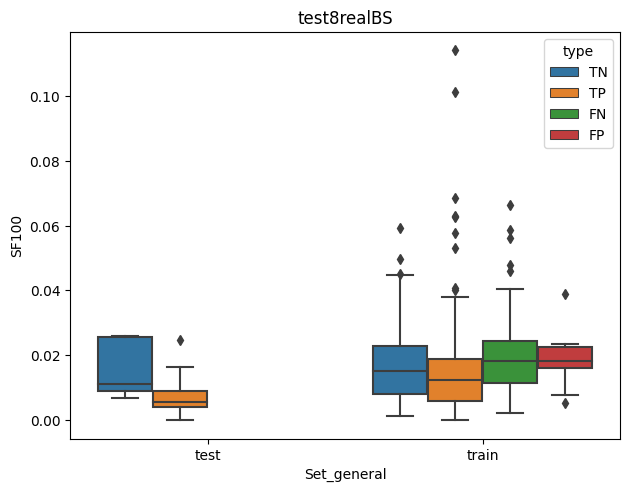

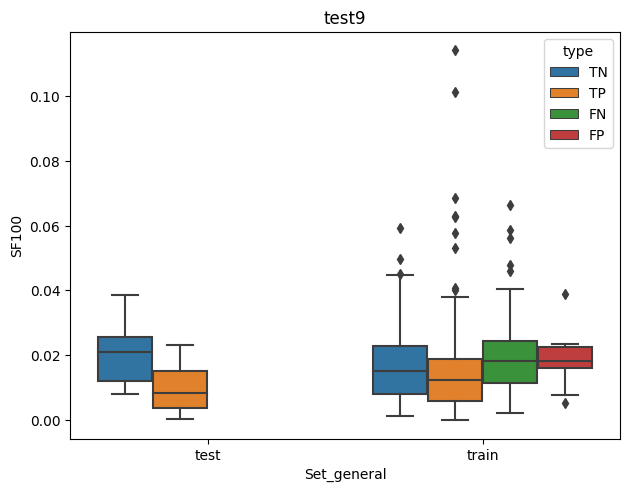

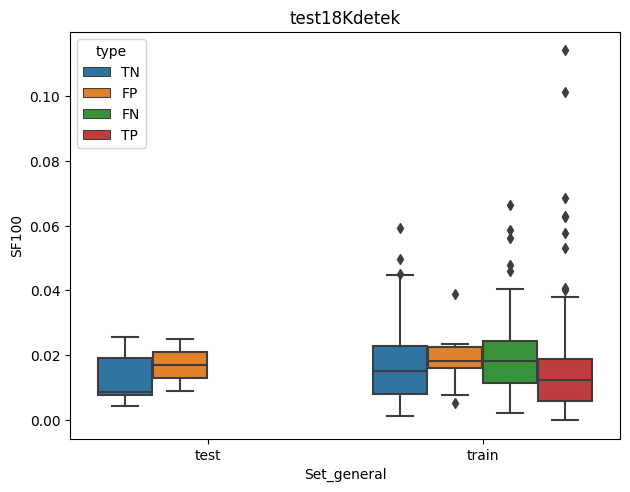

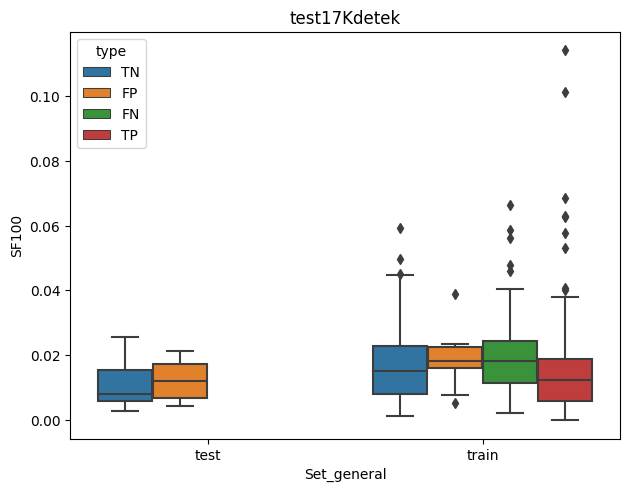

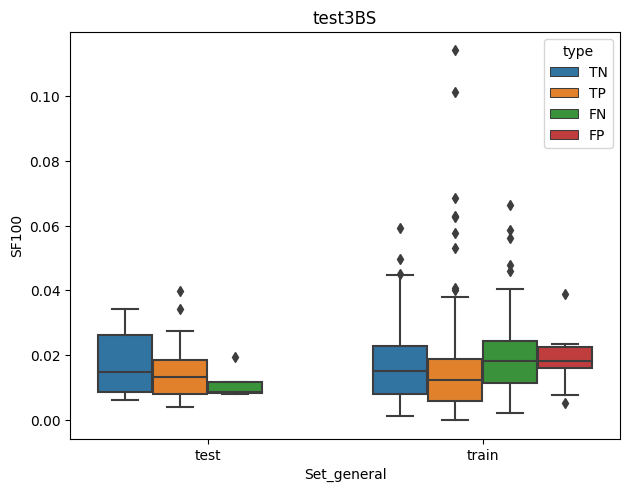

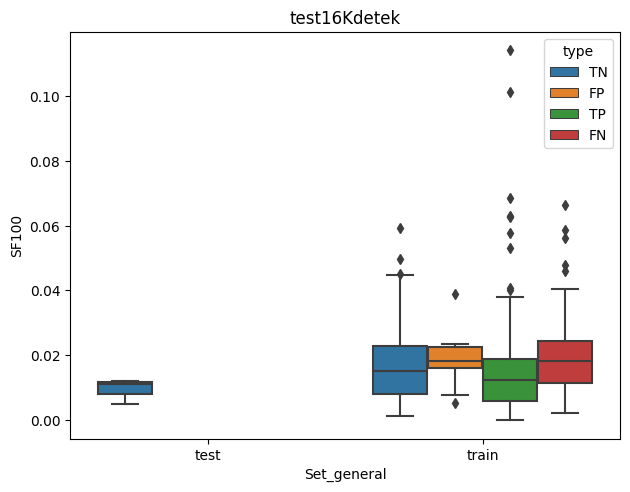

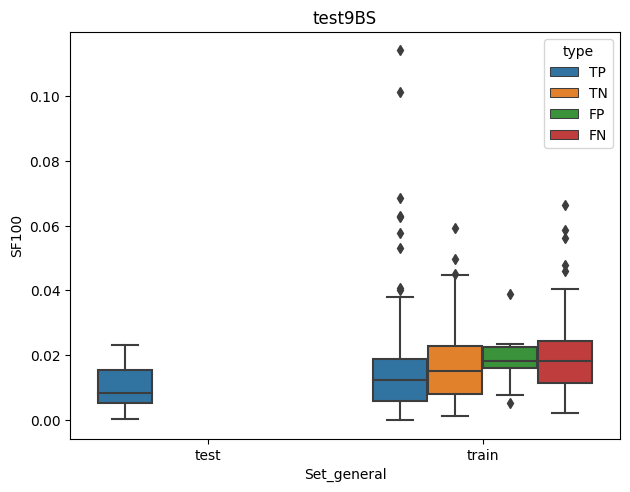

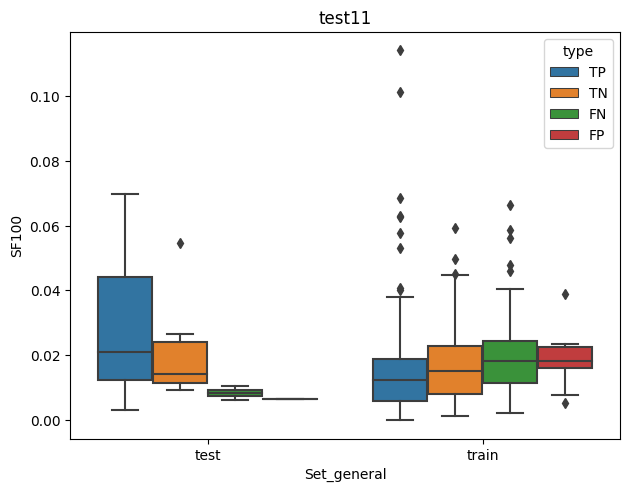

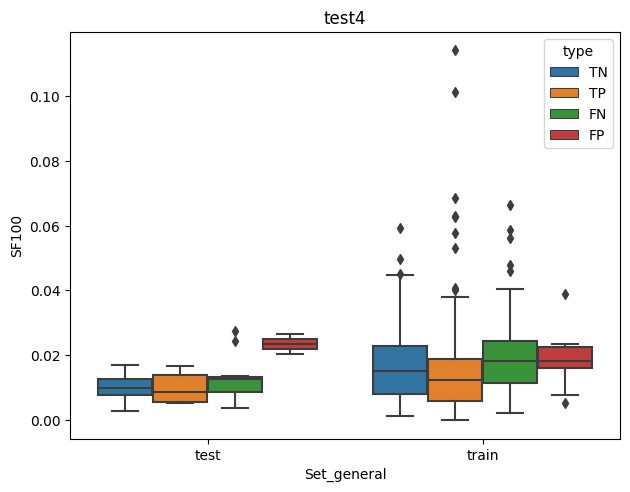

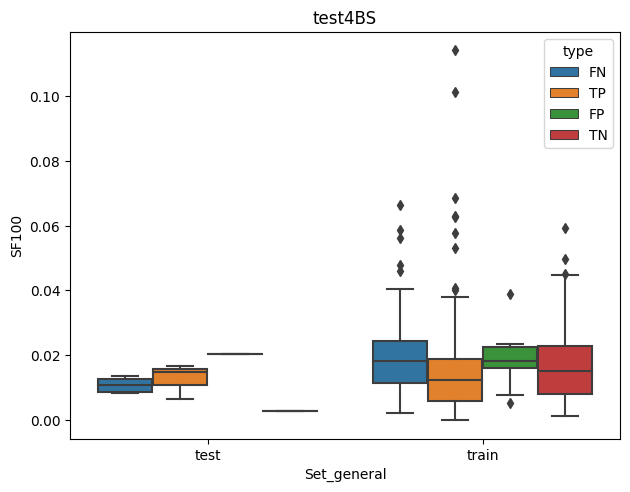

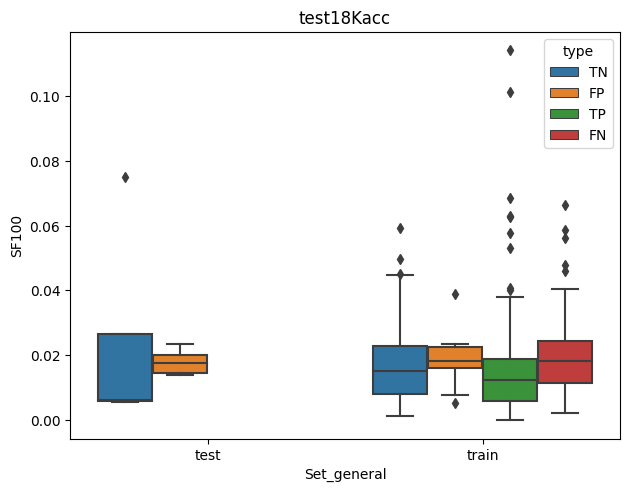

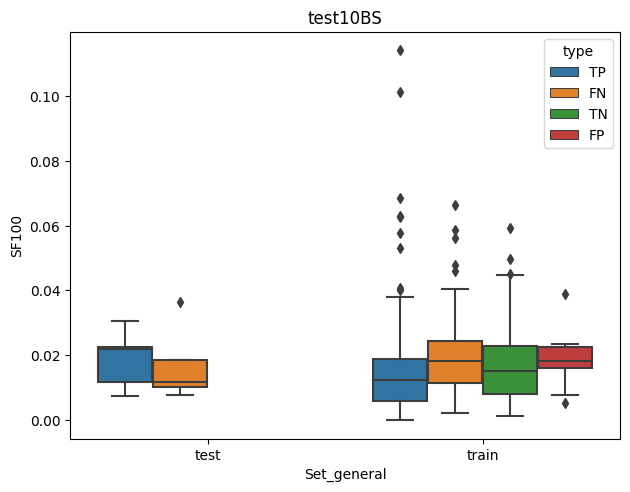

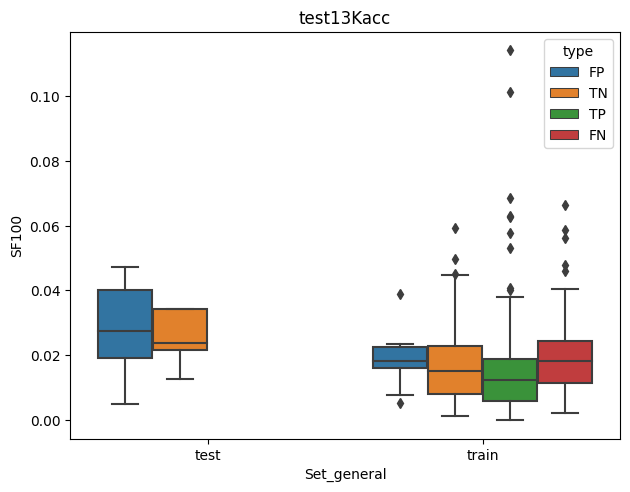

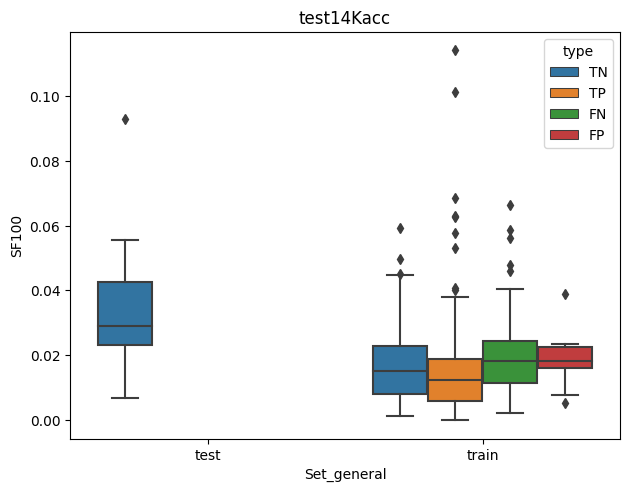

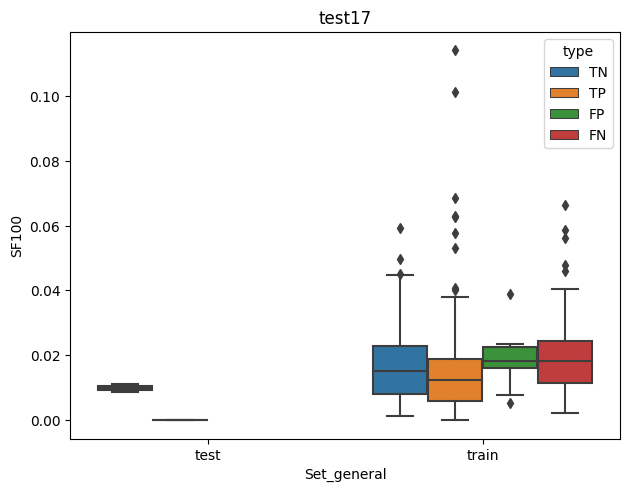

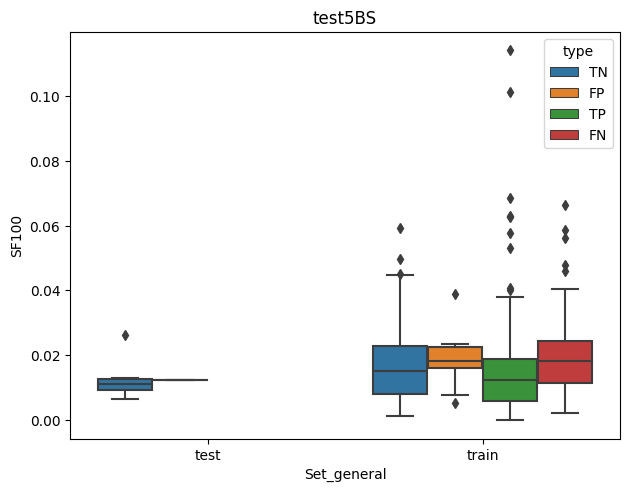

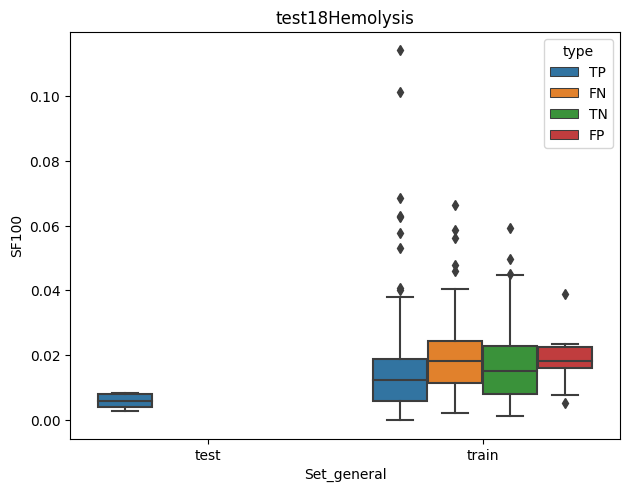

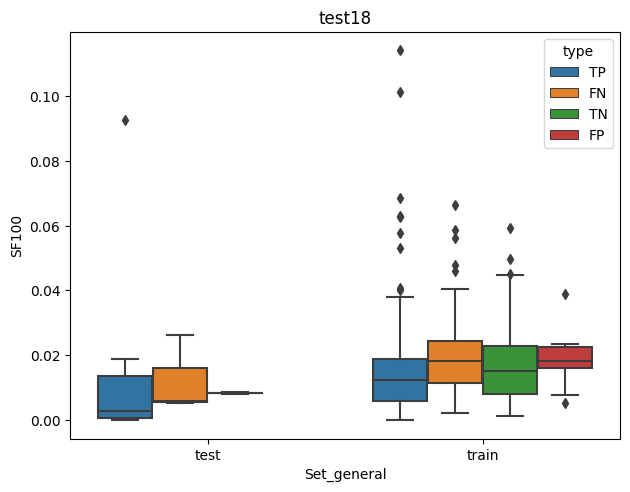

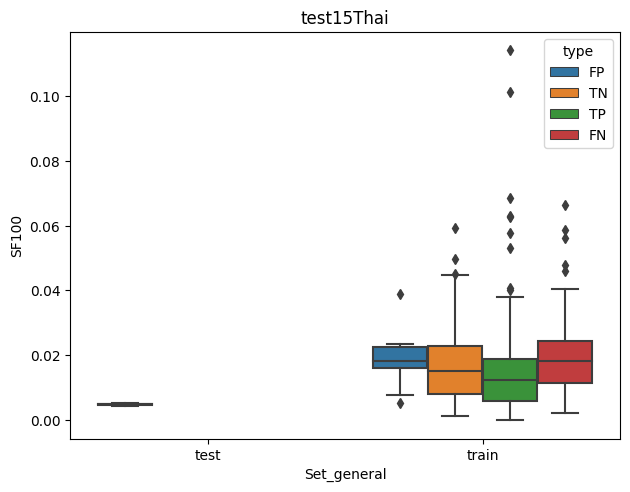

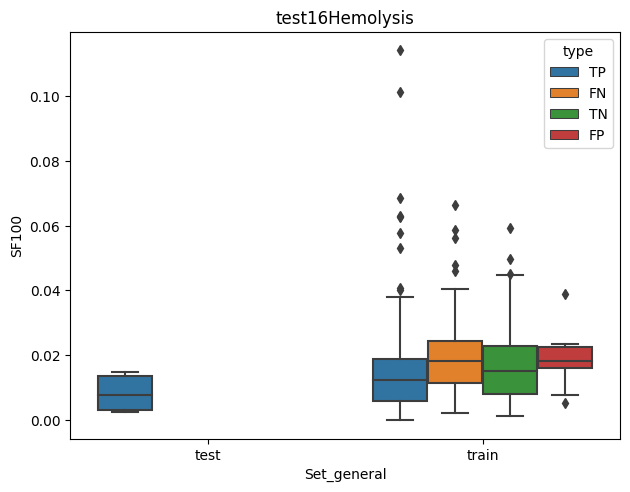

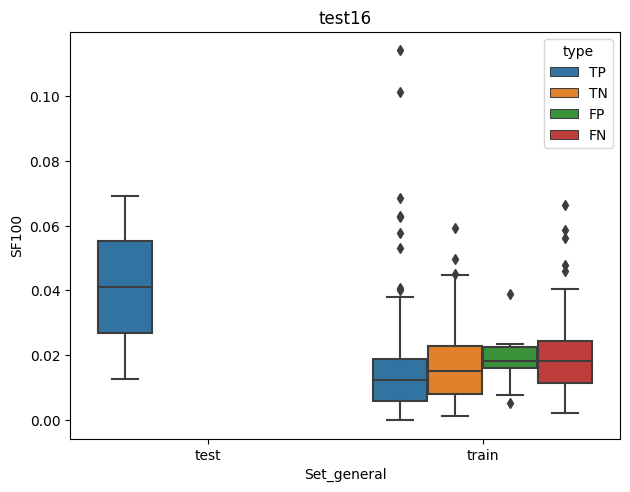

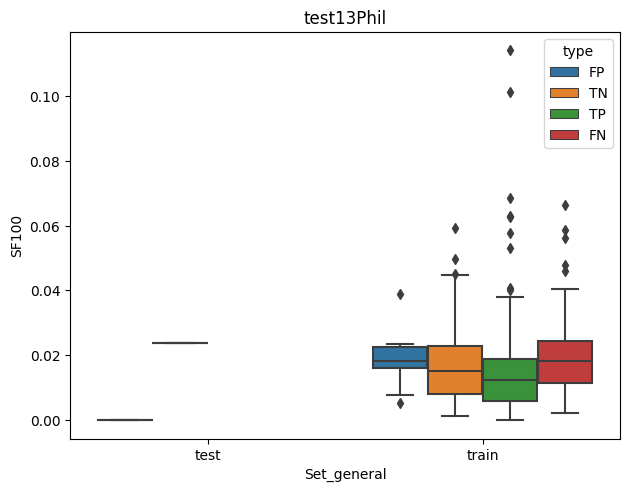

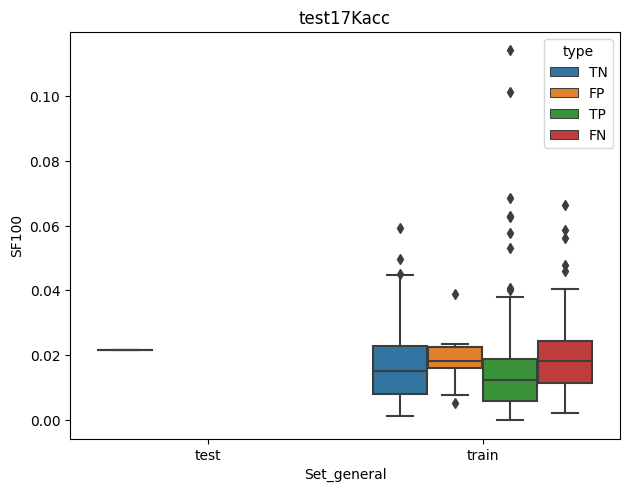

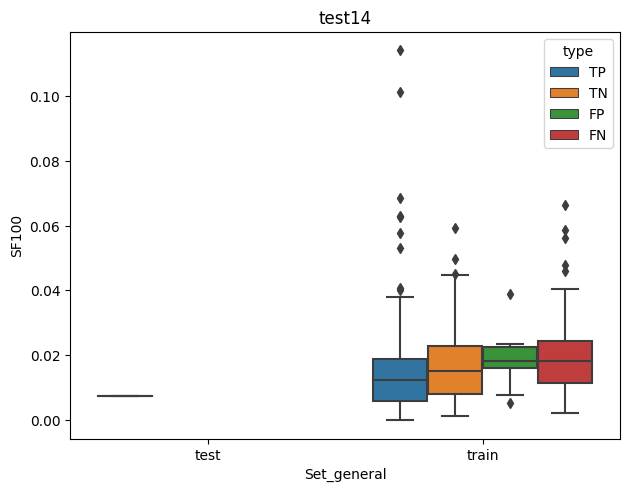

In [42]:
for input_set in [item for item in sfdf.Set.unique() if item != "train"]:
    tmpdf = sfdf[sfdf["Set"].isin(["train", input_set])].copy()
    tmpdf = tmpdf.sort_values(by = "Set_general")
    plt.figure()
    sns.boxplot(data = tmpdf, x = "Set_general", y = "SF100", hue = "type")
    plt.tight_layout()
    plt.title(input_set)
    plt.savefig(f"SF100_plotdir/boxplot_{input_set}.png")
